<a href="https://colab.research.google.com/github/subhasree0806/Real-time_passenger-/blob/main/AIRNZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving Airlinetest.csv to Airlinetest.csv


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [4]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


In [5]:
pain_points = {}
for col in df.columns[7:22]:
    avg = df[col].mean()
    pain_points[col] = avg
    print(f"Average {col}: {avg:.2f}")

Average Inflight wifi service: 2.72
Average Departure/Arrival time convenient: 3.05
Average Ease of Online booking: 2.76
Average Gate location: 2.98
Average Food and drink: 3.22
Average Online boarding: 3.26
Average Seat comfort: 3.45
Average Inflight entertainment: 3.36
Average On-board service: 3.39
Average Leg room service: 3.35
Average Baggage handling: 3.63
Average Checkin service: 3.31
Average Inflight service: 3.65
Average Cleanliness: 3.29
Average Departure Delay in Minutes: 14.31


In [6]:
dissatisfied_count = df[df['satisfaction'] == 'neutral or dissatisfied'].shape[0]
total_passengers = df.shape[0]
dissatisfied_percent = (dissatisfied_count / total_passengers) * 100
print(f"% Dissatisfied Passengers: {dissatisfied_percent:.2f}%")


% Dissatisfied Passengers: 56.10%


In [7]:
dissatisfied_count = df[df['satisfaction'] == 'satisfied'].shape[0]
total_passengers = df.shape[0]
Satisfied_percent = (dissatisfied_count / total_passengers) * 100
print(f"% satisfied Passengers: {Satisfied_percent:.2f}%")


% satisfied Passengers: 43.90%


In [8]:
delayed_over_20 = df[df['Departure Delay in Minutes'] > 20]
percent_delayed = (len(delayed_over_20) / len(df)) * 100
print(f"percentage Flights Delayed more 20 Minutes: {percent_delayed:.2f}%")


percentage Flights Delayed more 20 Minutes: 18.45%


In [9]:
pain_points_df = pd.DataFrame.from_dict(pain_points, orient='index', columns=['Average Score'])
pain_points_df.sort_values(by='Average Score',inplace=True)
pain_points_df

,Average Score
Inflight wifi service,2.724746
Ease of Online booking,2.756775
Gate location,2.977094
Departure/Arrival time convenient,3.046812
Food and drink,3.215353
Online boarding,3.261665
Cleanliness,3.286226
Checkin service,3.314175
Leg room service,3.350169
Inflight entertainment,3.357753


In [10]:
df['Customer Type'].value_counts()

,count
Customer Type,
Loyal Customer,21177
disloyal Customer,4799


In [11]:
df['satisfaction_binary'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
df.groupby('Customer Type')['satisfaction_binary'].mean()

,satisfaction_binary
Customer Type,
Loyal Customer,0.481419
disloyal Customer,0.251719


In [12]:
df['Class'].value_counts()
df['class_binary'] = df['Class'].map({
    'Business': 2,
    'Eco Plus': 1,
    'Eco': 0
})
df.groupby('Class')['satisfaction_binary'].mean()

,satisfaction_binary
Class,
Business,0.695158
Eco,0.193878
Eco Plus,0.247783


In [13]:
pain_point_cols = list(pain_points.keys())
df['Frustration_Score'] = df[pain_point_cols].mean(axis=1)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[pain_point_cols])


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['PainPointCluster'] = kmeans.fit_predict(X_scaled)


In [16]:
# Check average satisfaction per cluster
cluster_satisfaction = df.groupby('PainPointCluster')['satisfaction_binary'].mean()
frustration_cluster = cluster_satisfaction.idxmin()

# Count how many passengers are in that cluster
frustrated_count = df[df['PainPointCluster'] == frustration_cluster].shape[0]

print(f"Frustration Cluster: {frustration_cluster}")
print(f"Passenger Count in Frustration Cluster: {frustrated_count}")


Frustration Cluster: 0
Passenger Count in Frustration Cluster: 9705


In [17]:
frustration_scores = (
    df[df['PainPointCluster'] == 0][pain_point_cols]
    .mean()
    .sort_values()
)
print(frustration_scores)


Inflight entertainment                2.012365
Cleanliness                           2.154456
Food and drink                        2.225966
Inflight wifi service                 2.334570
Seat comfort                          2.397218
Ease of Online booking                2.609789
Online boarding                       2.634312
On-board service                      2.708501
Leg room service                      2.826481
Checkin service                       2.894796
Gate location                         2.991757
Departure/Arrival time convenient     3.029778
Inflight service                      3.046677
Baggage handling                      3.053478
Departure Delay in Minutes           16.482123
dtype: float64


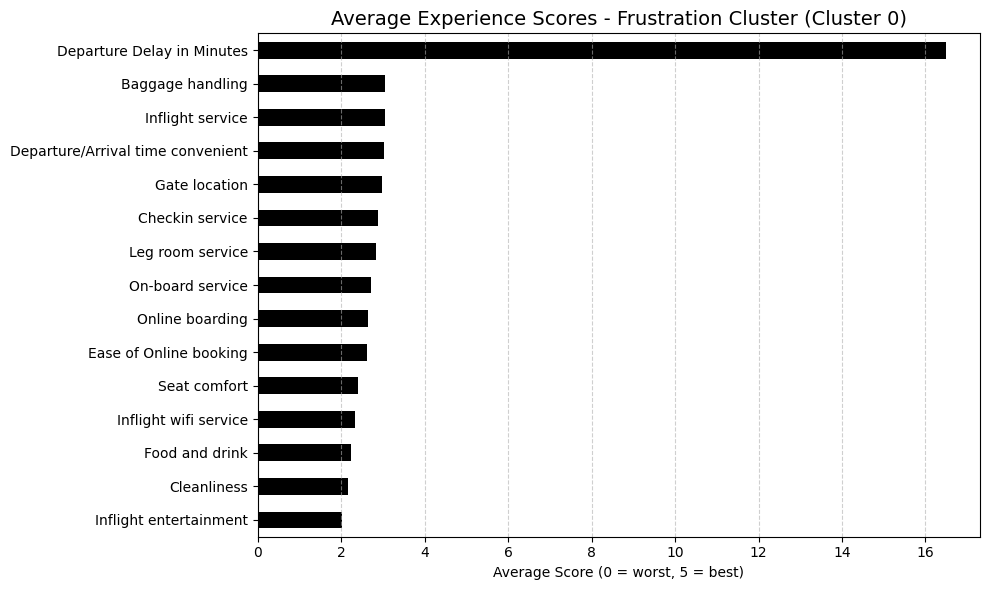

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
frustration_scores.plot(kind='barh', color='black')  # horizontal bar chart

plt.title('Average Experience Scores - Frustration Cluster (Cluster 0)', fontsize=14)
plt.xlabel('Average Score (0 = worst, 5 = best)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [19]:

funnel_cols = ['Ease of Online booking', 'Checkin service', 'Online boarding']


In [22]:
for col in funnel_cols:
    df[f'{col}_Success'] = df[col] >= 4
df['Funnel_Completed'] = df[[f'{col}_Success' for col in funnel_cols]].all(axis=1)
funnel_completion_rate = df['Funnel_Completed'].mean() * 100
print(f"Booking → Boarding Funnel Completion Rate: {funnel_completion_rate:.2f}%")


Booking → Boarding Funnel Completion Rate: 13.55%
